## Data Visualization and Accuracy Prediction of Epilepsy DB

#### created by scraping data from Google Patents

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
ds = pd.read_excel('all_data_0_1_extended.xlsx')

In [3]:
ds.head(1)

,inventor_name,submitter_name,patent,url,title,meta_content_schema_assignee,dd_itemprop_assigneeCurrent,dd_itemprop_assigneeOriginal,dd_itemprop_title,span_itempop_assigneeSearch,...,app_claim_priority,related_parent_app,related_child_app,publications,country_status,citations,patent_citations,non_pat_citations,meta_data,patent_success
0,"Jules Jacob, Norman COYLE, Thomas G. West, Don...",Aprecia Pharmaceuticals Company,WO2014144512A1,https://patents.google.com/patent/WO2014144512A1,Rapid disperse dosage form containing levetirace,Aprecia Pharmaceuticals Company,NaN,Aprecia Pharmaceuticals Company,Rapid disperse dosage form containing levetira...,Aprecia Pharmaceuticals Company,...,15,0,1,2,9,34,47,5,International application published with inter...,0


In [4]:
ds.shape

(2919, 27)

In [5]:
ds.describe()

,len_claims,priority_applications,app_claim_priority,related_parent_app,related_child_app,publications,country_status,citations,patent_citations,non_pat_citations,patent_success
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,12.506338,2.163412,1.179856,0.066461,0.079479,1.494690,8.544365,2.224049,2.610140,5.765673,0.021925
std,25.755704,1.856675,3.084629,0.394056,0.425200,0.603187,9.499901,15.416043,18.466337,58.844836,0.146465
min,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,15.000000,3.000000,1.000000,0.000000,0.000000,2.000000,12.000000,2.000000,2.000000,1.000000,0.000000
max,692.000000,21.000000,40.000000,11.000000,7.000000,5.000000,50.000000,462.000000,527.000000,1685.000000,1.000000


In [6]:
ds.columns

Index(['inventor_name', 'submitter_name', 'patent', 'url', 'title',
       'meta_content_schema_assignee', 'dd_itemprop_assigneeCurrent',
       'dd_itemprop_assigneeOriginal', 'dd_itemprop_title',
       'span_itempop_assigneeSearch', 'publicationDate', 'priorityDate',
       'filingDate', 'dateSubmitted', 'ifiStatus', 'len_claims',
       'priority_applications', 'app_claim_priority', 'related_parent_app',
       'related_child_app', 'publications', 'country_status', 'citations',
       'patent_citations', 'non_pat_citations', 'meta_data', 'patent_success'],
      dtype='object')

In [7]:
ds.drop(columns = ["meta_data"], inplace = True)

In [8]:
ds.shape

(2919, 26)

### Data Visualization

Text(0.5, 0.98, 'ifiStatus frequency')

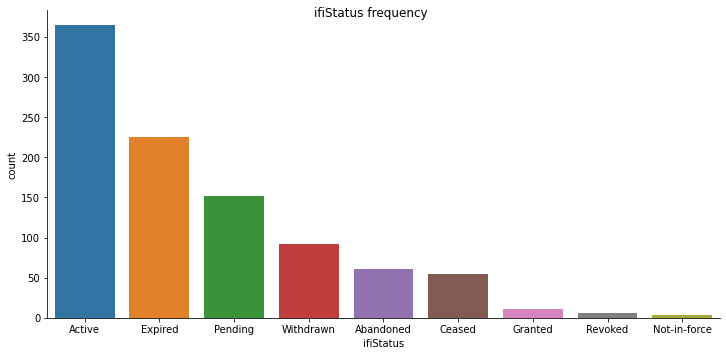

In [9]:
ax = sns.catplot(x="ifiStatus", kind="count", data=ds, height=5, aspect=2,
                order=ds['ifiStatus'].value_counts().index)
ax.fig.suptitle('ifiStatus frequency')

Text(0.5, 0.98, 'patent_success frequency')

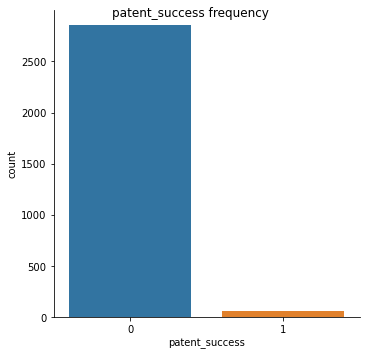

In [11]:
ax = sns.catplot(x="patent_success", kind="count", data=ds,
                order=ds['patent_success'].value_counts().index)
ax.fig.suptitle('patent_success frequency')

Text(0.5, 1.0, 'iFiStatus by citations and claims')

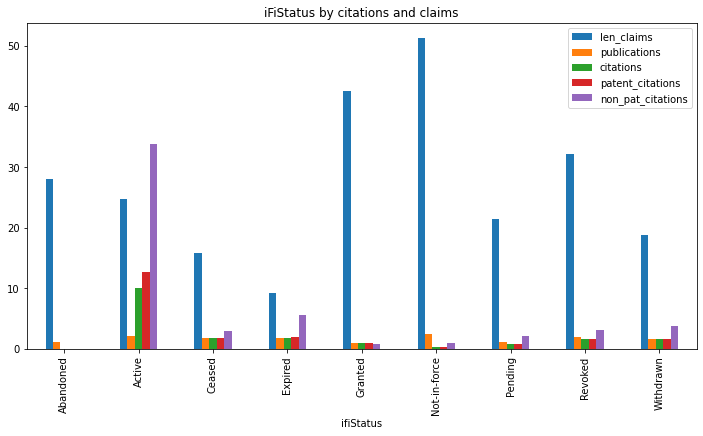

In [12]:
ifiStatus = ds[["len_claims", 
              "publications", 
              "citations", 
              "patent_citations",
              "non_pat_citations",
              "ifiStatus"]].groupby(["ifiStatus"]).agg("mean")
ifiStatus.plot.bar(figsize=(12,6))
plt.title('iFiStatus by citations and claims')

Text(0.5, 1.0, 'country_status by citations and claims')

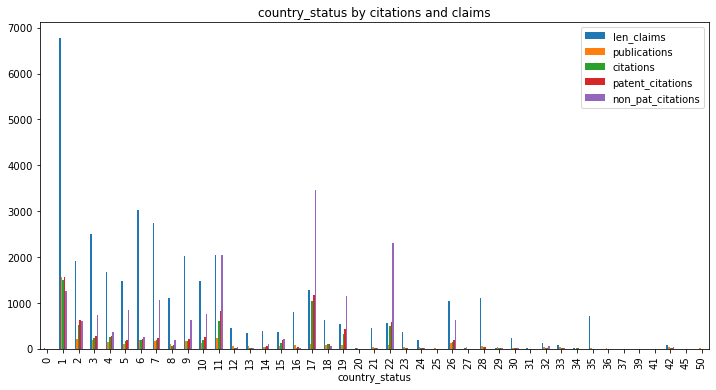

In [13]:
ifiStatus = ds[["len_claims", 
              "publications", 
              "citations", 
              "patent_citations",
              "non_pat_citations",
              "country_status"]].groupby(["country_status"]).agg("sum")
ifiStatus.plot.bar(figsize=(12,6))
plt.title('country_status by citations and claims')

Text(0.5, 1.0, 'country_status by publications and claims')

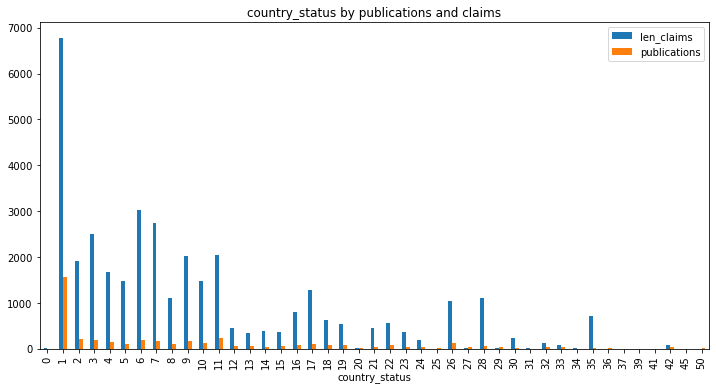

In [14]:
ifiStatus = ds[["len_claims", 
              "publications", 
              "country_status"]].groupby(["country_status"]).agg("sum")
ifiStatus.plot.bar(figsize=(12,6))
plt.title('country_status by publications and claims')

Text(0.5, 1.0, 'country_status by citations and claims')

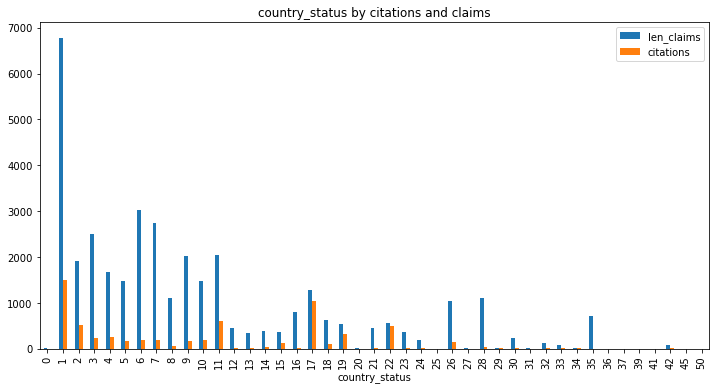

In [15]:
ifiStatus = ds[["len_claims", 
              "citations", 
              "country_status"]].groupby(["country_status"]).agg("sum")
ifiStatus.plot.bar(figsize=(12,6))
plt.title('country_status by citations and claims')

In [16]:
ds['ifiStatus'] = ds['ifiStatus'].fillna(0)

In [17]:
ds['ifiStatus'].value_counts()

0               1947
Active           365
Expired          226
Pending          152
Withdrawn         92
Abandoned         61
Ceased            55
Granted           11
Revoked            6
Not-in-force       4
Name: ifiStatus, dtype: int64

In [18]:
ds['ifiStatus'] = ds['ifiStatus'].replace({r'NaN':0, r'Active':1, r'Ceased':2, 
                                          r'Withdrawn':3, r'Expired':4, r'Ceased':5,
                                          r'Granted':6, r'Revoked':7, r'Not-in-force':8,
                                          r'Pending':9, r'Abandoned':10})

In [19]:
corr = ds.corr()

corr_mask = abs(ds.corr()) > 0.2
matrix = corr[corr_mask]
matrix

,ifiStatus,len_claims,priority_applications,app_claim_priority,related_parent_app,related_child_app,publications,country_status,citations,patent_citations,non_pat_citations,patent_success
ifiStatus,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
len_claims,NaN,1.000000,0.249131,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
priority_applications,NaN,0.249131,1.000000,NaN,0.309755,0.241830,NaN,0.233762,0.260991,0.266076,0.250805,NaN
app_claim_priority,NaN,NaN,NaN,1.000000,NaN,0.260314,NaN,NaN,NaN,NaN,NaN,NaN
related_parent_app,NaN,NaN,0.309755,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
related_child_app,NaN,NaN,0.241830,0.260314,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
publications,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
country_status,NaN,NaN,0.233762,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
citations,NaN,NaN,0.260991,NaN,NaN,NaN,NaN,NaN,1.000000,0.993402,0.912546,NaN
patent_citations,NaN,NaN,0.266076,NaN,NaN,NaN,NaN,NaN,0.993402,1.000000,0.902096,NaN


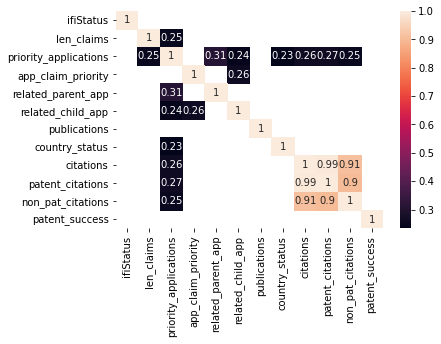

In [20]:
ax = sns.heatmap(matrix, annot = True)

In [21]:
ds.describe()

,ifiStatus,len_claims,priority_applications,app_claim_priority,related_parent_app,related_child_app,publications,country_status,citations,patent_citations,non_pat_citations,patent_success
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1.349092,12.506338,2.163412,1.179856,0.066461,0.079479,1.494690,8.544365,2.224049,2.610140,5.765673,0.021925
std,2.632980,25.755704,1.856675,3.084629,0.394056,0.425200,0.603187,9.499901,15.416043,18.466337,58.844836,0.146465
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.000000,2.000000,1.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,15.000000,3.000000,1.000000,0.000000,0.000000,2.000000,12.000000,2.000000,2.000000,1.000000,0.000000
max,10.000000,692.000000,21.000000,40.000000,11.000000,7.000000,5.000000,50.000000,462.000000,527.000000,1685.000000,1.000000


In [22]:
ds.columns

Index(['inventor_name', 'submitter_name', 'patent', 'url', 'title',
       'meta_content_schema_assignee', 'dd_itemprop_assigneeCurrent',
       'dd_itemprop_assigneeOriginal', 'dd_itemprop_title',
       'span_itempop_assigneeSearch', 'publicationDate', 'priorityDate',
       'filingDate', 'dateSubmitted', 'ifiStatus', 'len_claims',
       'priority_applications', 'app_claim_priority', 'related_parent_app',
       'related_child_app', 'publications', 'country_status', 'citations',
       'patent_citations', 'non_pat_citations', 'patent_success'],
      dtype='object')

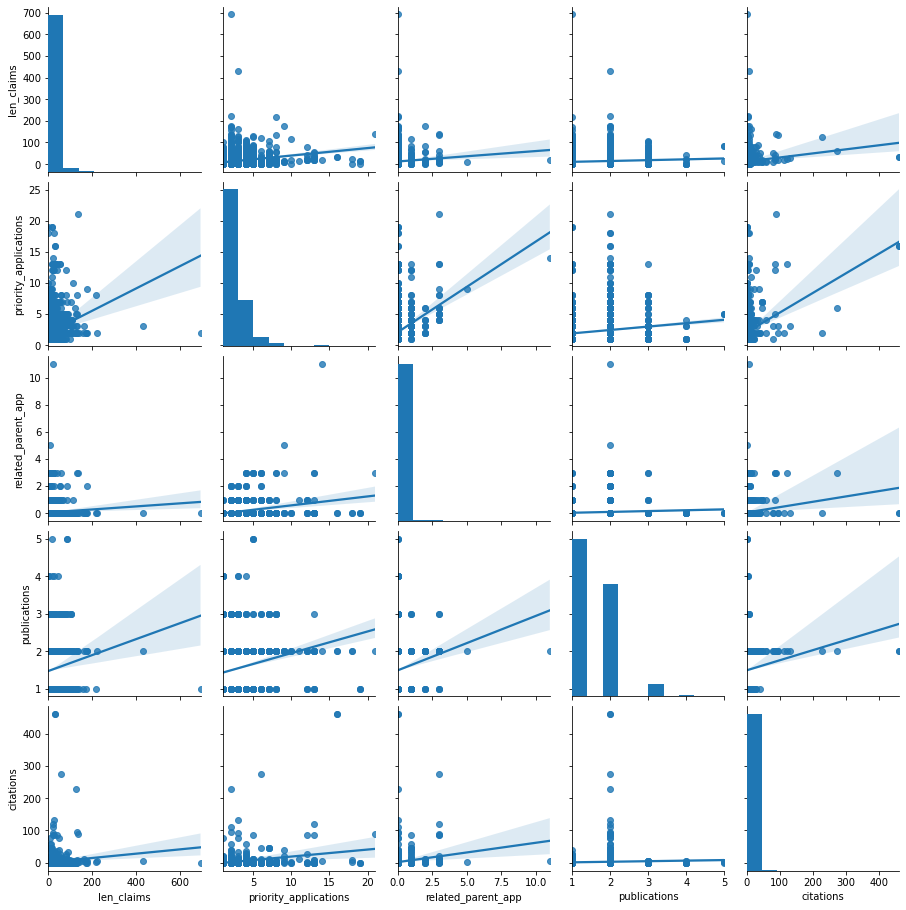

In [23]:
sns.pairplot(ds[["len_claims", "priority_applications", "related_parent_app",
                "publications", "citations"]], kind="reg")

In [24]:
import matplotlib.dates as mdates

In [25]:
condition1 = ds["publicationDate"] > "1975"

In [26]:
ds_pub_date = ds[condition1]

In [27]:
ds_pub_date = ds_pub_date.set_index("publicationDate")

In [28]:
ds_pub_date.shape

(2899, 25)

In [29]:
ds_pub_date.columns

Index(['inventor_name', 'submitter_name', 'patent', 'url', 'title',
       'meta_content_schema_assignee', 'dd_itemprop_assigneeCurrent',
       'dd_itemprop_assigneeOriginal', 'dd_itemprop_title',
       'span_itempop_assigneeSearch', 'priorityDate', 'filingDate',
       'dateSubmitted', 'ifiStatus', 'len_claims', 'priority_applications',
       'app_claim_priority', 'related_parent_app', 'related_child_app',
       'publications', 'country_status', 'citations', 'patent_citations',
       'non_pat_citations', 'patent_success'],
      dtype='object')

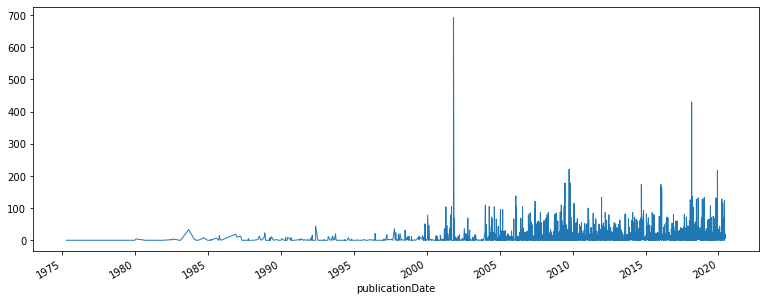

In [30]:
ds_pub_date['len_claims'].plot(linewidth=1, figsize = (13, 5));

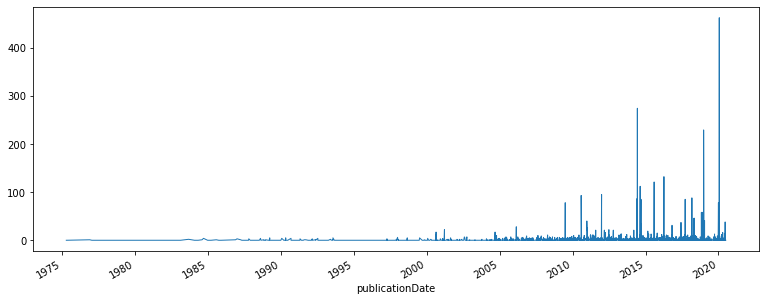

In [31]:
ds_pub_date['citations'].plot(linewidth=1, figsize = (13, 5));

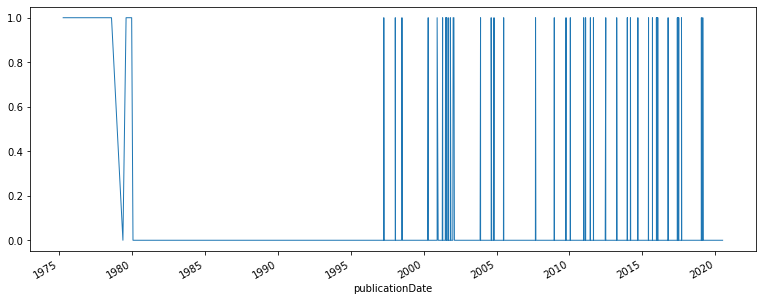

In [32]:
ds_pub_date['patent_success'].plot(linewidth=1, figsize = (13, 5));

### Praparing for to train and to test the models with different methodics of prediction

In [33]:
test = ds[["ifiStatus", "len_claims", "priority_applications", "app_claim_priority", 
           "related_parent_app", "related_child_app", "publications",
          "country_status", "citations", "patent_citations",
          "non_pat_citations", "patent_success"]]

In [34]:
test_time = ds[["patent", "len_claims", "priority_applications", "app_claim_priority", 
           "related_parent_app", "related_child_app", "publications",
          "publications", "country_status", "citations", "patent_citations",
          "non_pat_citations", "patent_success",
          "publicationDate", "priorityDate", "filingDate", "dateSubmitted"]]

In [35]:
y = test['patent_success']
X = test.drop(['patent_success'], axis = 1)

#### Libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

In [36]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 29)

### 1. Calculate logistic regression accuracy

In [124]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
acc_lr = lr.score(X_test,y_test)*100
print(f"Logistic Regression Test Accuracy {round(acc_lr, 2)}%")

Logistic Regression Test Accuracy 97.95%


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 1a. Confusion matrix for logistic regression

In [133]:
y_pred = lr.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[857,   2],
       [ 16,   1]], dtype=int64)

#### 1b. Accuracy score for logistic regression

In [134]:
y_pred = lr.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[857,   2],
       [ 16,   1]], dtype=int64)

In [45]:
accuracy_score(y_test, y_pred, normalize = True, sample_weight = None) * 100

97.94520547945206

### 2. Calculate dicision tree accuracy

In [125]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

acc_dtc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy {round(acc_dtc, 2)}%")

Decision Tree Test Accuracy 96.69%


In [47]:
y_pred = dtc.predict(X_test)
conf = confusion_matrix(y_test, y_pred)
conf

array([[845,  14],
       [ 14,   3]], dtype=int64)

### 3. K-Neighbourhood classifier accuracy

In [128]:
knn = KNeighborsClassifier(n_neighbors = 16)  # n_neighbors means k
knn.fit(X_train, y_train)
# prediction = knn.predict(x_test)
y_pred = knn.predict(X_test)

acc_knn = knn.score(X_test, y_test)*100
print(f"16 neighbors KNN Score: {round(acc_knn,2)}%")

16 neighbors KNN Score: 98.06%


### 4. Support Vector Machines (SVM)

In [131]:
clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_svm = metrics.accuracy_score(y_test, y_pred)*100
print(f"SVM Accuracy: {round(acc_svm,2)}%")

SVM Accuracy: 98.06%


#### SVM Confusion Matrix

Confusion matrix without normalization:
[[859   0]
 [ 17   0]]
Normalized confusion matrix:
[[0.98 0.  ]
 [0.02 0.  ]]


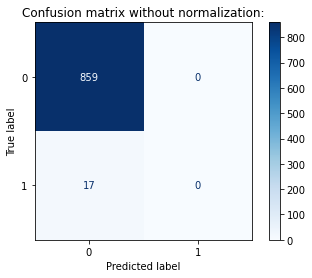

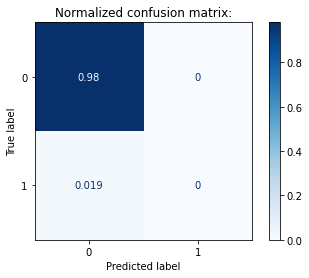

In [122]:
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
np.set_printoptions(precision = 2)
titles_options = [('Confusion matrix without normalization:', None),
               ('Normalized confusion matrix:', 'pred')]
class_names = [0, 1]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                cmap = plt.cm.Blues,
                                normalize=normalize)
    disp.ax_.set_title(title)
    print(title)
    print(disp.confusion_matrix)
plt.show()

### Total results

In [132]:
print(f"Linear Regression Accuracy: {round(acc_lr,2)}%")
print(f"Decision Tree Accuracy: {round(acc_dtc,2)}%")
print(f"KNN Accuracy: {round(acc_knn,2)}%")
print(f"SVM Accuracy: {round(acc_svm,2)}%")

Linear Regression Accuracy: 97.95%
Decision Tree Accuracy: 96.69%
KNN Accuracy: 98.06%
SVM Accuracy: 98.06%
